![JohnSnowLabs](https://sparknlp.org/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp/blob/master/examples/python/transformers/HuggingFace%20in%20Spark%20NLP%20-%20SwinForImageClassification.ipynb)

## Import SwinForImageClassification models from HuggingFace 🤗 into Spark NLP 🚀 

### Let's keep in mind a few things before we start 😊 

- This feature is only in `Spark NLP 4.3.0` and after. So please make sure you have upgraded to the latest Spark NLP release
- You can import Swin models trained/fine-tuned for question answering via `SwinForImageClassification` or `TFSwinForImageClassification`. These models are usually under `Image Classification` category and have `swin` in their labels
- Reference: [TFSwinForImageClassification](https://huggingface.co/docs/transformers/model_doc/swin#transformers.TFSwinForImageClassification)
- Some [example models](https://huggingface.co/models?other=swin)

## Export and Save HuggingFace model

- Let's install `HuggingFace` and `TensorFlow`. You don't need `TensorFlow` to be installed for Spark NLP, however, we need it to load and save models from HuggingFace.
- We lock TensorFlow on `2.9.2` version and Transformers on `4.21.3`. This doesn't mean it won't work with the future releases, but we wanted you to know which versions have been tested successfully.

In [ ]:
! pip install -q transformers==4.21.3 tensorflow==2.9.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.7 MB/s eta 0:00:00


- HuggingFace comes with a native `saved_model` feature inside `save_pretrained` function for TensorFlow based models. We will use that to save it as TF `SavedModel`.
- We'll use [microsoft/swin-tiny-patch4-window7-224](https://huggingface.co/microsoft/swin-tiny-patch4-window7-224) model from HuggingFace as an example
- In addition to `TFSwinForImageClassification` we also need to save the `ViTFeatureExtractor` (Swin uses the same one as ViT)

In [ ]:
from transformers import TFSwinForImageClassification, SwinForImageClassification, ViTFeatureExtractor 

MODEL_NAME = 'microsoft/swin-tiny-patch4-window7-224'
  
feature_extractor = ViTFeatureExtractor.from_pretrained(MODEL_NAME)

try:
  model = TFSwinForImageClassification.from_pretrained(MODEL_NAME)
except:
  model = TFSwinForImageClassification.from_pretrained(MODEL_NAME, from_pt=True)
    
model.save_pretrained("./{}".format(MODEL_NAME), saved_model=True)

All model checkpoint layers were used when initializing TFSwinForImageClassification.

All the layers of TFSwinForImageClassification were initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSwinForImageClassification for predictions without further training.


In [ ]:
import json

# get label2id in JSON string 
json_data = json.dumps(model.config.label2id)

In [ ]:
# Let's make sure the id is type int and not string

new_dict = dict()
old_dict = json.loads(json_data)
for k in old_dict:
  v = old_dict[k]
  if type(v) == str:
    v = int(v)
  new_dict[k] = v
json_data = new_dict

# now we can save the labels.json to our assets directory
with open(f'{MODEL_NAME}/saved_model/1/assets/labels.json', 'w') as outfile:    
      json.dump(json_data, outfile)
      outfile.write('\n')    

feature_extractor.save_pretrained(f"{MODEL_NAME}/saved_model/1/assets/")

['microsoft/swin-tiny-patch4-window7-224/saved_model/1/assets/preprocessor_config.json']

Let's have a look inside these two directories and see what we are dealing with:

In [ ]:
!ls -l {MODEL_NAME}

total 110896
-rw-r--r-- 1 root root     69896 Apr 11 09:44 config.json
drwxr-xr-x 3 root root      4096 Apr 11 09:44 saved_model
-rw-r--r-- 1 root root 113477448 Apr 11 09:44 tf_model.h5


In [ ]:
!ls -l {MODEL_NAME}/saved_model/1

total 24532
drwxr-xr-x 2 root root     4096 Apr 11 09:44 assets
-rw-r--r-- 1 root root   344247 Apr 11 09:44 keras_metadata.pb
-rw-r--r-- 1 root root 24762960 Apr 11 09:44 saved_model.pb
drwxr-xr-x 2 root root     4096 Apr 11 09:44 variables


In [ ]:
!ls -l {MODEL_NAME}/saved_model/1/assets

total 36
-rw-r--r-- 1 root root 29552 Apr 11 09:44 labels.json
-rw-r--r-- 1 root root   240 Apr 11 09:44 preprocessor_config.json


- As you can see, we need the SavedModel from `saved_model/1/` path
- We also be needing `lables.json` and `preprocessor_config.json` in our `assets`

## Import and Save SwinForImageClassification in Spark NLP


- Let's install and setup Spark NLP in Google Colab
- This part is pretty easy via our simple script

In [ ]:
! wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2023-04-11 09:44:53--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2023-04-11 09:44:54--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2023-04-11 09:44:54--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

Let's start Spark with Spark NLP included via our simple `start()` function

In [ ]:
import sparknlp
# let's start Spark with Spark NLP
spark = sparknlp.start()

- Let's use `loadSavedModel` functon in `SwinForImageClassification` which allows us to load TensorFlow model in SavedModel format
- `loadSavedModel` accepts two params, first is the path to the TF SavedModel. The second is the SparkSession that is `spark` variable we previously started via `sparknlp.start()`
- NOTE: `loadSavedModel` accepts local paths in addition to distributed file systems such as `HDFS`, `S3`, `DBFS`, etc. This feature was introduced in Spark NLP 4.2.2 release. Keep in mind the best and recommended way to move/share/reuse Spark NLP models is to use `write.save` so you can use `.load()` from any file systems natively.st and recommended way to move/share/reuse Spark NLP models is to use `write.save` so you can use `.load()` from any file systems natively.



In [ ]:
from sparknlp.annotator import *
from sparknlp.base import *

imageClassifier = SwinForImageClassification.loadSavedModel(
     '{}/saved_model/1'.format(MODEL_NAME),
     spark
 )\
  .setInputCols(["image_assembler"])\
  .setOutputCol("class")

- Let's save it on disk so it is easier to be moved around and also be used later via `.load` function

In [ ]:
imageClassifier.write().overwrite().save("./{}_spark_nlp".format(MODEL_NAME))

Let's clean up stuff we don't need anymore

In [ ]:
!rm -rf {MODEL_NAME}_tokenizer {MODEL_NAME}

Awesome 😎  !

This is your SwinForImageClassification model from HuggingFace 🤗  loaded and saved by Spark NLP 🚀 

In [ ]:
! ls -l {MODEL_NAME}_spark_nlp

total 134556
drwxr-xr-x 4 root root      4096 Apr 11 09:47 fields
-rw-r--r-- 1 root root 137776599 Apr 11 09:47 image_classification_swin_tensorflow
drwxr-xr-x 2 root root      4096 Apr 11 09:47 metadata


Now let's see how we can use it on other machines, clusters, or any place you wish to use your new and shiny SwinForImageClassification model in Spark NLP 🚀 pipeline! 

In [ ]:
!wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/image/hippopotamus.JPEG

--2023-04-11 09:47:12--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/image/hippopotamus.JPEG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147353 (144K) [image/jpeg]
Saving to: ‘hippopotamus.JPEG’

hippopotamus.JPEG   100%[===================>] 143.90K  --.-KB/s    in 0.004s  

2023-04-11 09:47:12 (34.9 MB/s) - ‘hippopotamus.JPEG’ saved [147353/147353]



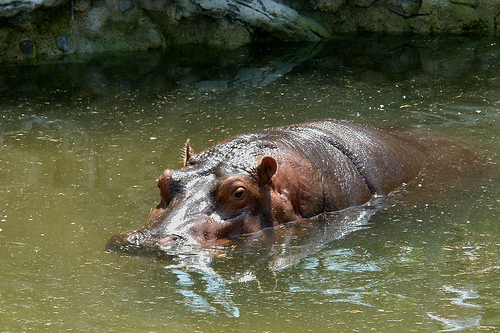

In [ ]:
from IPython.display import Image, display
display(Image("hippopotamus.JPEG"))

In [ ]:
document_assembler = ImageAssembler() \
    .setInputCol("image") \
    .setOutputCol("image_assembler")

imageClassifier_loaded = SwinForImageClassification.load("./{}_spark_nlp".format(MODEL_NAME))\
  .setInputCols(["image_assembler"])\
  .setOutputCol("class")

pipeline = Pipeline().setStages([
    document_assembler,
    imageClassifier_loaded
])

test_image = spark.read\
    .format("image")\
    .option("dropInvalid", value = True)\
    .load("./hippopotamus.JPEG")

result = pipeline.fit(test_image).transform(test_image)

result.select("class.result").show(1, False)

+----------------------------------------------------------+
|result                                                    |
+----------------------------------------------------------+
|[hippopotamus, hippo, river horse, Hippopotamus amphibius]|
+----------------------------------------------------------+



That's it! You can now go wild and use hundreds of `SwinForImageClassification` models from HuggingFace 🤗 in Spark NLP 🚀 
